# Lecture 4

Substitution Method; Median and Selection

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Substitution Method

In [2]:
def nastyRecurrence(n):
    if n <= 10:
        return 1
    return n + nastyRecurrence(n/5) + nastyRecurrence(7*n/10)

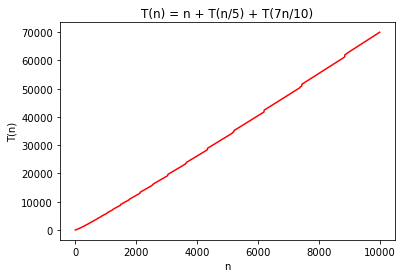

In [3]:
nVals = list( range(1,10000,10))
rVals = [ nastyRecurrence(n) for n in nVals]
plt.plot( nVals, rVals, color="red")
plt.xlabel("n")
plt.ylabel("T(n)")
plt.title("T(n) = n + T(n/5) + T(7n/10)")
plt.show()

## Part 2: SELECT

In [4]:
# some extra functions that will be useful
from auxFileLecture4 import *

Here are a bunch of different ways we might pick a pivot.  
We'll see our final way (chooseFancyFivePivot) later on in this notebook.

In [5]:
# Choose a random pivot; this takes time O(1)
def chooseRandomPivot(A):
    return choice( range(len(A)))

In [6]:
# Choose the pivot to be n/2; also takes time O(1)
def chooseArbitraryPivot(A):
    return round(len(A)/2)

In [7]:
# Choose the pivot to be t (unless the array is shorter than t); takes time O(1)
def chooseMyFavoritePivot(A,t=3):
    if len(A) < t+1:
        return 0
    return t

In [8]:
# this finds the "best" pivot (that is, that splits the array in half); but in runs in time O(n log(n))
def chooseIdealPivot(A):
    B = A[:]
    B.sort()
    pivotVal = B[(len(B)/2).__trunc__()]
    return A.index(pivotVal)

In [9]:
# this finds the *worst* pivot; runs in time O(n)
def chooseWorstPivot(A):
    m = min(A)
    return A.index(m)

Now let's define our SELECT algorithm.  It can use any of the above pivot-choosing algorithms in it.

In [29]:
# Returns L, A[p], R, where L has all the elements less or equal to A[p], R has all the elements greater than A[p]
def myPartition(A, p):
    L = []
    R = []
    for i in range(len(A)):
        if i == p:
            continue
        if A[i] <= A[p]: # This is NOT a good idea if the array doesn't have distinct elts.  (Why?)
            L.append(A[i])
        else:
            R.append(A[i])
    return L, A[p], R

# Returns the k'th smallest element of A
def mySelect( A, k ):
    if len(A) <= 50:
        A = mergeSort(A)
        return A[k-1]
    p = chooseMyFavoritePivot(A) # We can plug in whatever choosePivot algorithm we want here! 
    L, mid, R = myPartition(A,p)
    if len(L) == k-1:
        return mid
    elif len(L) > k-1: # then the k'th smallest thing is the k'th smallest thing in the left half
        return mySelect(L, k)
    elif len(L) < k-1: # then the k'th smallest thing is the (k - len(L) - 1)'st smallest thing in the right half
        return mySelect(R, k - len(L) - 1)

A quick sanity-check...

In [30]:
# Let's make sure it works!  Make a list with all the numbers from 1 to 49 in some order
from random import shuffle
A = list(range(1,50))
shuffle(A)
print(A)

[34, 30, 26, 4, 2, 25, 9, 15, 16, 44, 45, 20, 49, 42, 23, 7, 27, 17, 48, 6, 13, 40, 41, 43, 35, 29, 47, 32, 46, 21, 33, 12, 31, 38, 8, 36, 5, 14, 37, 10, 18, 39, 22, 19, 28, 24, 1, 3, 11]


In [31]:
# k'th smallest should be k
print("The 6'th smallest is", mySelect(A, 6))
print("The 12'th smallest is", mySelect(A, 12))
print("The 15'th smallest is", mySelect(A, 15))

The 6'th smallest is 6
The 12'th smallest is 12
The 15'th smallest is 15


### How long does it take?

Let's try a few different pivot strategies and also the sort-it-and-find-the-right-value strategy.

In [13]:
nVals = list(range(50, 3050, 100)) + list(range(3000, 5000, 500)) 

In [14]:
# run this cell when we have chooseRandomPivot in mySelect
nValuesRandom, tValuesRandom = trySelectABunch(mySelect, Ns = nVals, numTrials=50, listMax = 100000)

In [15]:
# Try this one when we have chooseMyFavoritePivot(A,0) in mySelect,
# and then we'll choose the random=False flag in trySelectABunch, which chooses an array that's worst-case for the choice of p=0.
# Only go up to 1000 since it takes too long...
nValsSmall = range(50, 1000, 100)
nValuesWorst, tValuesWorst = trySelectABunch(mySelect, Ns=nValsSmall, numTrials=25, listMax = 100000, random=False)

In [16]:
# Try this one when we have chooseFancyFivePivot in mySelect; chooseFancyFivePivot is defined below, so come back to this.
nValuesFancy, tValuesFancy = trySelectABunch(mySelect, Ns=nVals, numTrials=50, listMax = 100000)

In [17]:
def mergeSortSelect(A,k):
    A = mergeSort(A)
    return A[k-1]

In [18]:
# Now try mergeSortSelect
nValuesMerge, tValuesMerge = trySelectABunch(mergeSortSelect, Ns=nVals, numTrials=50, listMax = 100000)

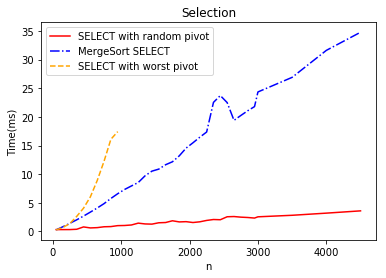

In [19]:
plt.plot(nValuesRandom, tValuesRandom, color="red", label="SELECT with random pivot")
# Comment out the next line until you've generated nValuesFancy, tValuesFancy
#plt.plot(nValuesFancy, tValuesFancy, ":", color="green", label="SELECT with (dumb impl. of) fancy pivot")
plt.plot(nValuesMerge, tValuesMerge, "-.", color="blue", label="MergeSort SELECT")
plt.plot(nValuesWorst, tValuesWorst, "--", color="orange", label="SELECT with worst pivot")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Selection")

Is it plausible that MergeSort-SELECT takes time O(nlog(n)) and fancy-SELECT takes time O(n), given the picture above?  Shouldn't the blue curve eventually go above the green curve?  Yes, but if the constant hiding inside the O(n) is like 20 (or rather, 20 times larger than the constant inside of the O(nlog(n))), that won't happen until n = 2^20 (which is really big, at least for my laptop).  The picture below shows that it *is* plausible that MergeSort-SELECT is O(nlog(n)) while fancy-SELECT is O(n).

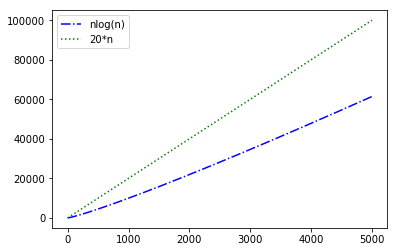

In [20]:
xVals = range(1,5000)
plt.plot( xVals, [(x*np.log(x)/np.log(2)) for x in xVals] , "-.",color="blue", label="nlog(n)" )
plt.plot( xVals, [20*x for x in xVals], ":",color = "green", label="20*n")
plt.legend()

### Pivot-choosing strategy

Here's the pivot-choosing strategy we discussed in class, which runs in time O(n) (plus a call to mySelect), and finds a pivot that's close to the median.

In [21]:
# first define a naive (nlog(n)-time) median algorithm to use for the groups of size 5.
def naiveMedian(A):
    A = mergeSort(A) # nlogn time sorting alg
    return A[(len(A)/2).__trunc__()]

# this is the final pivot selection algorithm described on the slides 
# (not implemented very slickly)
# it finds a "pretty good" pivot (splits the array close to in half).
# It runs in time O(n), in addition to a call to mySelect.
def chooseFancyFivePivot(A):
    # first, split A into n/5 groups, and find the median of each group.
    current = 0
    submedians = []
    while current < len(A):
        if current + 5 < len(A):
            currentGrp = A[current:current+5]
        else:
            currentGrp = A[current:]
        submedians.append( naiveMedian(currentGrp) )
        current += 5
    # now that we have our list of sub-medians, we'll find what the median is of those,
    # using a recursive call to mySelect.
    pivotVal = mySelect( submedians, (len(submedians)/2).__trunc__() )
    # now we should actually return the index of pivotVal.  
    # if we were being smart we would have implemented mySelect to just do this, 
    # but since we're interested in clarity and big-oh runtime, we'll just find the index in O(n) time.
    for i in range(len(A)):
        if A[i] == pivotVal:
            return i
    print("If we ever get to this stage, that's a problem!")

Now we can got back and plug this choosePivot function into our mySelect algorithm.

(Seems to work).

In [22]:
def testDifferentPivotMethods(n, trials=100, listMax = 1000):
    rLst = [] # this will be the indices we return with the random pivot
    fLst = [] # with a fancy pivot
    for t in range(trials):
        # generate a random list
        A = [ choice(range(listMax)) for i in range(n) ]
        # random pivot
        rPivot = chooseRandomPivot(A)
        rVal = A[rPivot]
        # fancy pivot
        fPivot = chooseFancyFivePivot(A)
        fVal = A[fPivot]
        # how good *are* these pivots?  
        A.sort()
        rLst.append(A.index(rVal))
        fLst.append(A.index(fVal))
    return rLst, fLst

In [23]:
n = 101
rLst, fLst = testDifferentPivotMethods(n, trials=500, listMax=1000)

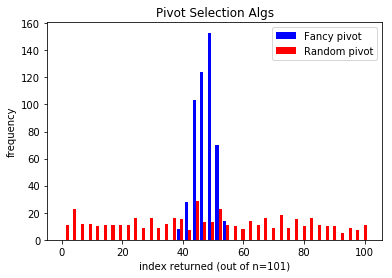

In [24]:
 # now plot them
plt.hist([fLst,rLst], label=["Fancy pivot","Random pivot"], color=["blue","red"],bins=40,range=(0,n))
plt.xlabel("index returned (out of n=" + str(n) + ")")
plt.ylabel("frequency")
plt.legend()
plt.title("Pivot Selection Algs")
plt.show()